In [496]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, or_, asc

In [497]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd

In [498]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [499]:
list(Measurement.__table__.columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [500]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Deliverable 1: Determine the Summary Statistics for June

In [501]:
import datetime as dt

In [502]:
june_str = "06"

In [503]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs). \
            filter(func.strftime("%m", Measurement.date) == june_str).all()

In [504]:
#  3. Convert the June temperatures to a list.
june_temperatures_list = list(results)

In [505]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temperatures_list, columns=['date', 'June Temps'])

In [506]:
june_temps_df.set_index(june_temps_df['date'], inplace=True)

In [507]:
june_temps_df.head()

,date,June Temps
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0


In [508]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## Deliverable 2: Determine the Summary Statistics for December

In [509]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_str = "12"
results = session.query(Measurement.date, Measurement.tobs). \
    filter(func.strftime("%m", Measurement.date) == dec_str).all()

In [510]:
# 7. Convert the December temperatures to a list.
dec_temperatures_list = list(results)

In [511]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temperatures_list, columns=['date', 'December Temps'])
dec_temps_df.set_index(dec_temps_df['date'], inplace=True)

In [512]:
dec_temps_df.head()

,date,December Temps
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0


In [513]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Deliverable 3: Queries

### Average and Median Temperatures for June and December

In [514]:
# Return tobs, year and month columns for June and December 
results = session.query(Measurement.date, Measurement.tobs, func.strftime("%Y", Measurement.date), func.strftime("%m", Measurement.date)).\
            filter(or_(func.strftime("%m", Measurement.date) == june_str, func.strftime("%m", Measurement.date) == dec_str)).all()

In [515]:
temperatures_list = list(results)
temperatures_df = pd.DataFrame(temperatures_list, columns=['date','tobs','year','month'])
temperatures_df['month_name'] = pd.to_datetime(temperatures_df['date']).dt.month_name()

In [516]:
temperatures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3217 non-null   object 
 1   tobs        3217 non-null   float64
 2   year        3217 non-null   object 
 3   month       3217 non-null   object 
 4   month_name  3217 non-null   object 
dtypes: float64(1), object(4)
memory usage: 125.8+ KB


In [517]:
temperatures_df.head(10)

,date,tobs,year,month,month_name
0,2010-06-01,78.0,2010,06,June
1,2010-06-02,76.0,2010,06,June
2,2010-06-03,78.0,2010,06,June
3,2010-06-04,76.0,2010,06,June
4,2010-06-05,77.0,2010,06,June
5,2010-06-06,78.0,2010,06,June
6,2010-06-07,77.0,2010,06,June
7,2010-06-08,78.0,2010,06,June
8,2010-06-09,78.0,2010,06,June
9,2010-06-10,79.0,2010,06,June


In [518]:
temperatures_df.to_csv('temperatures_df.csv')

In [519]:
temps_averages_df = temperatures_df.groupby(['year','month_name'], as_index=False).agg(['mean','median'])['tobs']

In [520]:
# Fitler out 2017 data since tobs does not exist for December
temps_averages_df.reset_index(inplace=True)

In [521]:
temps_averages_df

,year,month_name,mean,median
0,2010,December,70.208511,70.0
1,2010,June,74.925620,75.0
2,2011,December,70.820628,71.0
3,2011,June,73.938326,74.0
4,2012,December,71.188073,72.0
5,2012,June,74.000000,74.0
6,2013,December,71.094017,71.0
7,2013,June,74.599078,75.0
8,2014,December,69.896861,70.0
9,2014,June,75.027907,75.0


In [522]:
temps_averages_df['year'] = temps_averages_df['year'].astype('int')

In [523]:
temps_averages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        15 non-null     int32  
 1   month_name  15 non-null     object 
 2   mean        15 non-null     float64
 3   median      15 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 548.0+ bytes


In [524]:
temps_averages_df = temps_averages_df.query("year < 2017")

In [525]:
temps_averages_df

,year,month_name,mean,median
0,2010,December,70.208511,70.0
1,2010,June,74.925620,75.0
2,2011,December,70.820628,71.0
3,2011,June,73.938326,74.0
4,2012,December,71.188073,72.0
5,2012,June,74.000000,74.0
6,2013,December,71.094017,71.0
7,2013,June,74.599078,75.0
8,2014,December,69.896861,70.0
9,2014,June,75.027907,75.0


In [526]:
temps_pivot_df =  pd.pivot(temps_averages_df, columns=['month_name'], index='year')

In [527]:
temps_pivot_df.columns = ['Dec_mean', 'June_mean', 'Dec_median', 'June_median']

In [528]:
temps_pivot_df

,Dec_mean,June_mean,Dec_median,June_median
year,,,,
2010,70.208511,74.925620,70.0,75.0
2011,70.820628,73.938326,71.0,74.0
2012,71.188073,74.000000,72.0,74.0
2013,71.094017,74.599078,71.0,75.0
2014,69.896861,75.027907,70.0,75.0
2015,73.423913,74.990148,74.0,76.0
2016,71.130000,75.175258,71.0,75.5


In [529]:
import matplotlib.pyplot as plt
%matplotlib inline

In [530]:
def plot_bar(df, title, ylabel, save_fig):
    """
    plot bar chart on pandas dataframe passed in
    
    args:
        df: dataframe with year, month mean and median
        title: title of plot
        ylabel: ylabel for plot
        save_fig: name of png file to save figure
    
    """
    df.plot.bar(figsize=(8,5))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.savefig(save_fig)
    plt.show()

In [531]:
year_month_mean_df = temps_pivot_df[['Dec_mean', 'June_mean']]
year_month_mean_df.columns = ['December', 'June']

In [532]:
year_month_mean_df

,December,June
year,,
2010,70.208511,74.925620
2011,70.820628,73.938326
2012,71.188073,74.000000
2013,71.094017,74.599078
2014,69.896861,75.027907
2015,73.423913,74.990148
2016,71.130000,75.175258


In [533]:
year_month_mean_df.loc[:, 'June'] - year_month_mean_df.loc[:, 'December']

year
2010    4.717109
2011    3.117698
2012    2.811927
2013    3.505061
2014    5.131046
2015    1.566235
2016    4.045258
dtype: float64

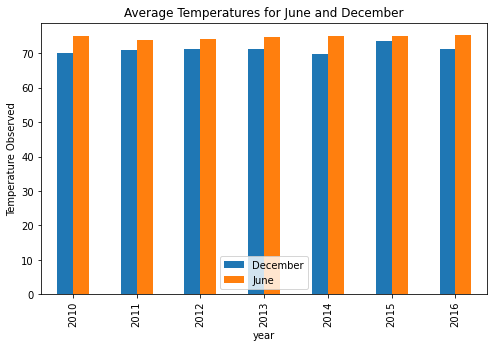

In [534]:
plot_bar(year_month_mean_df, 'Average Temperatures for June and December', 'Temperature Observed', 'images/avg_temps_june_dec.png')

In [535]:
year_month_median_df = averages_year_month_df[['Dec_median', 'June_median']]
year_month_median_df.columns = ['December', 'June']

In [536]:
year_month_median_df

,December,June
year,,
2010,70.0,75.0
2011,71.0,74.0
2012,72.0,74.0
2013,71.0,75.0
2014,70.0,75.0
2015,74.0,76.0
2016,71.0,75.5


In [537]:
year_month_median_df.loc[:,'June'] - year_month_median_df.loc[:,'December']

year
2010    5.0
2011    3.0
2012    2.0
2013    4.0
2014    5.0
2015    2.0
2016    4.5
dtype: float64

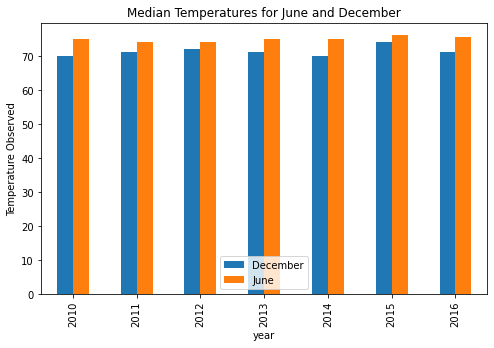

In [538]:
plot_bar(year_month_median_df, 'Median Temperatures for June and December', 'Temperature Observed', 'images/median_temps_june_dec.png')

### Average and Median Precipitation for June and December

In [539]:
# Return prcp, year and month columns for June and December 
results = session.query(Measurement.date, Measurement.prcp, func.strftime("%Y", Measurement.date), func.strftime("%m", Measurement.date)).\
            filter(or_(func.strftime("%m", Measurement.date) == june_str, func.strftime("%m", Measurement.date) == dec_str)).all()

In [540]:
precip_list = list(results)
precip_df = pd.DataFrame(temperatures_list, columns=['date','prcp','year','month'])
precip_df['month_name'] = pd.to_datetime(temperatures_df['date']).dt.month_name()

In [541]:
precip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3217 non-null   object 
 1   prcp        3217 non-null   float64
 2   year        3217 non-null   object 
 3   month       3217 non-null   object 
 4   month_name  3217 non-null   object 
dtypes: float64(1), object(4)
memory usage: 125.8+ KB


In [542]:
precip_df.to_csv('precip_df.csv')

In [543]:
precip_averages_df = precip_df.groupby(["year","month_name"], as_index=False).agg(["mean","median"])['prcp']

In [544]:
precip_averages_df.reset_index(inplace=True)

In [545]:
precip_averages_df['year'] = precip_averages_df['year'].astype(int)

In [546]:
precip_averages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        15 non-null     int32  
 1   month_name  15 non-null     object 
 2   mean        15 non-null     float64
 3   median      15 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 548.0+ bytes


In [547]:
precip_averages_df

,year,month_name,mean,median
0,2010,December,70.208511,70.0
1,2010,June,74.925620,75.0
2,2011,December,70.820628,71.0
3,2011,June,73.938326,74.0
4,2012,December,71.188073,72.0
5,2012,June,74.000000,74.0
6,2013,December,71.094017,71.0
7,2013,June,74.599078,75.0
8,2014,December,69.896861,70.0
9,2014,June,75.027907,75.0


In [548]:
precip_averages_df = precip_averages_df.query("year < 2017")

In [549]:
precip_averages_df

,year,month_name,mean,median
0,2010,December,70.208511,70.0
1,2010,June,74.925620,75.0
2,2011,December,70.820628,71.0
3,2011,June,73.938326,74.0
4,2012,December,71.188073,72.0
5,2012,June,74.000000,74.0
6,2013,December,71.094017,71.0
7,2013,June,74.599078,75.0
8,2014,December,69.896861,70.0
9,2014,June,75.027907,75.0


In [550]:
precip_pivot_df = pd.pivot(precip_averages_df, columns=['month_name'], index='year')

In [551]:
precip_pivot_df

mean              median      
month_name   December       June December  June
year                                           
2010        70.208511  74.925620     70.0  75.0
2011        70.820628  73.938326     71.0  74.0
2012        71.188073  74.000000     72.0  74.0
2013        71.094017  74.599078     71.0  75.0
2014        69.896861  75.027907     70.0  75.0
2015        73.423913  74.990148     74.0  76.0
2016        71.130000  75.175258     71.0  75.5

In [552]:
precip_pivot_df.columns = ['Dec_mean', 'June_mean', 'Dec_median', 'June_median']

In [553]:
precip_pivot_df

,Dec_mean,June_mean,Dec_median,June_median
year,,,,
2010,70.208511,74.925620,70.0,75.0
2011,70.820628,73.938326,71.0,74.0
2012,71.188073,74.000000,72.0,74.0
2013,71.094017,74.599078,71.0,75.0
2014,69.896861,75.027907,70.0,75.0
2015,73.423913,74.990148,74.0,76.0
2016,71.130000,75.175258,71.0,75.5


In [554]:
precip_mean_df = precip_pivot_df[['Dec_mean', 'June_mean']]
precip_mean_df.columns = ['December', 'June']

In [555]:
precip_mean_df

,December,June
year,,
2010,70.208511,74.925620
2011,70.820628,73.938326
2012,71.188073,74.000000
2013,71.094017,74.599078
2014,69.896861,75.027907
2015,73.423913,74.990148
2016,71.130000,75.175258


In [556]:
precip_mean_df.loc[:, 'June'] - precip_mean_df.loc[:, 'December']

year
2010    4.717109
2011    3.117698
2012    2.811927
2013    3.505061
2014    5.131046
2015    1.566235
2016    4.045258
dtype: float64

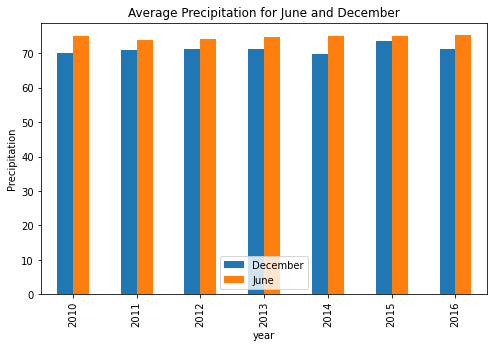

In [557]:
plot_bar(precip_mean_df, 'Average Precipitation for June and December', 'Precipitation', 'images/avg_precip_june_dec.png')

In [558]:
precip_median_df = precip_pivot_df[['Dec_median', 'June_median']]
precip_median_df.columns = ['December', 'June']

In [559]:
precip_median_df

,December,June
year,,
2010,70.0,75.0
2011,71.0,74.0
2012,72.0,74.0
2013,71.0,75.0
2014,70.0,75.0
2015,74.0,76.0
2016,71.0,75.5


In [560]:
precip_median_df.loc[:, 'June'] - precip_median_df.loc[:, 'December']

year
2010    5.0
2011    3.0
2012    2.0
2013    4.0
2014    5.0
2015    2.0
2016    4.5
dtype: float64

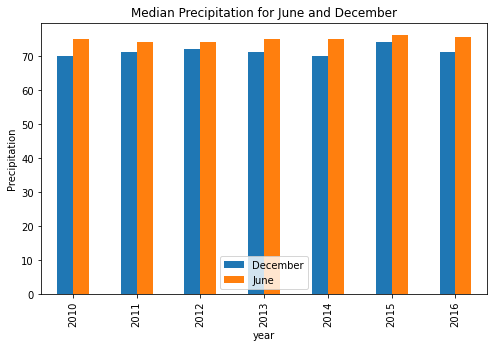

In [561]:
plot_bar(precip_median_df, 'Median Precipitation for June and December', 'Precipitation', 'images/median_precip_june_dec.png')